Modelo cargado desde '../Models/90%Acc.keras'.
Found 3289 files belonging to 5 classes.
Using 657 files for validation.
10/10 - 175s - 18s/step - accuracy: 0.1437 - loss: 3.7748
Métricas de evaluación del modelo: Pérdida = 3.7747912406921387, Precisión = 0.14374999701976776
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Reporte de clasificación:
                  precision    recall  f1-score   support

Chinche salivosa       0.14      0.28      0.19        75
        Clororis       0.00      0.00      0.00        37
       Hoja sana       0.00      0.00      0.00        86
    Roya naranja       0.16      0.24      0.19       103
    Roya purpura       0.00 

C:\Users\ealda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ealda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ealda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

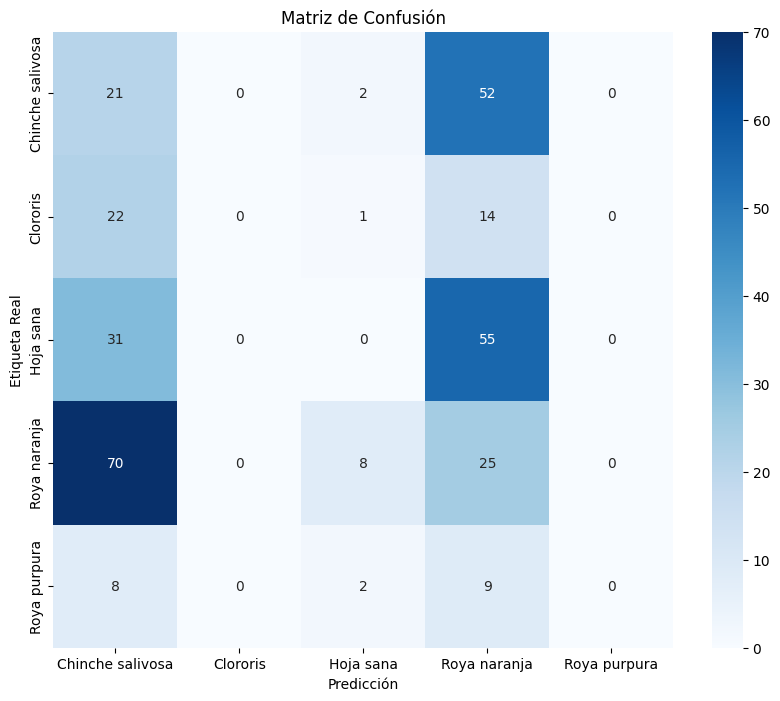

In [2]:
# -*- coding: utf-8 -*-
"""Evaluar un Modelo Keras Guardado"""

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Definir constantes
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 123
DATASET_DIR = '../arcgis-survey-images'
CLASS_NAMES = ['Chinche salivosa', 'Clororis', 'Hoja sana', 'Roya naranja', 'Roya purpura']

# # Montar Google Drive si es necesario (opcional, si trabajas con Colab)
# from google.colab import drive
# drive.mount('/content/drive')

# Cargar el modelo entrenado de Keras
MODEL_PATH = '../Models/90%Acc.keras'
model = tf.keras.models.load_model(MODEL_PATH)
print(f"Modelo cargado desde '{MODEL_PATH}'.")

# Cargar el conjunto de datos de prueba
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    labels="inferred",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED,
    validation_split=0.2,
    subset="validation"
)

# Dividir el conjunto de validación en validación y prueba
test_ds = test_ds.shard(num_shards=2, index=1)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f"Métricas de evaluación del modelo: Pérdida = {test_loss}, Precisión = {test_acc}")

# Predicción de etiquetas en el conjunto de prueba
y_pred = []
y_true = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()
